# banc marketing

**Résumé:**
Les données sont liées aux campagnes de marketing direct (appels téléphoniques) d'une institution bancaire portugaise. Le but de la classification est de prédire si le client souscrira un dépôt à terme (variable y).

Informations sur l'ensemble de données:
Les données sont liées aux campagnes de marketing direct d'une institution bancaire portugaise. Les campagnes de marketing étaient basées sur des appels téléphoniques. Souvent, plus d'un contact avec le même client était nécessaire, afin d'accéder si le produit (dépôt à terme bancaire) était («oui») ou non («non») souscrit.

### Informations d'attribut:
#### Données clients de la banque:
  * Age (numérique)
  * Job: type d'emploi (catégoriel: 'admin.', 'Cols bleus', 'entrepreneur', 'femme de ménage', 'gestion', 'retraité', 'indépendant', 'services', 'étudiant', ' technicien ',' sans emploi ',' inconnu ')
  * Marital: état matrimonial (catégoriel: 'divorcé', 'marié', 'célibataire', ' inconnu'; note: 'divorcé' signifie divorcé ou veuf)
  * Education (catégorique: «basique.4 ans», «basique.6 ans», «basique.9 ans», «lycée», «analphabète», «cours professionnel», «diplôme universitaire», «inconnu»)
  * Default: le crédit est-il par défaut? (catégorique: 'non', 'oui', 'inconnu')
  * Housing: un prêt au logement? (catégorique: 'non', 'oui', 'inconnu')
  * Loan: a un prêt personnel? (catégorique: 'non', 'oui', 'inconnu')

#### Lié au dernier contact de la campagne en cours:
  * Contact: type de communication de contact (catégoriel:
'cellulaire', 'téléphone')
  * Month: dernier mois de contact de l'année (catégoriel: 'jan', 'feb', 'mar',
…, 'nov', 'dec')
  * Dayofweek: dernier jour de contact de la semaine (catégoriel:
'lun', 'mar', 'mer', 'jeu', 'ven')
  * Duration: durée du dernier contact, en secondes (numérique). Remarque importante
: cet attribut affecte fortement la cible de sortie (par exemple, si
durée = 0 alors y = 'non'). Pourtant, la durée n'est pas connue avant qu'un appel ne
soit effectué. De plus, après la fin de l'appel, y est évidemment connu.
Ainsi, cette entrée ne doit être incluse qu'à des fins de référence et
doit être écartée si l'intention est d'avoir un
modèle prédictif réaliste .


#### Autres attributs:
  * Campaign: nombre de contacts réalisés pendant cette campagne et pour
ce client (numérique, inclut le dernier contact)
  * Pdays: nombre de jours qui se sont écoulés après le dernier
contact du client à partir d'une campagne précédente (numérique; 999 signifie que le client n'a pas
été contacté précédemment)
  * Previous: nombre de contacts réalisés avant cette campagne et pour
ce client (numérique)
  * Poutcome: résultat de la campagne marketing précédente (catégoriel:
'échec', 'inexistant', 'succès')
Attributs du contexte social et économique
  * Emp.var.rate: taux de variation de l'emploi - indicateur trimestriel
(numérique)
Cons.price.idx: indice des prix à la consommation - indicateur mensuel (numérique)
  * Cons.conf.idx: indice de confiance des consommateurs - indicateur mensuel
(numérique)
  * Euribor3m: taux euribor 3 mois - indicateur journalier (numérique)
  * Nr.employed: nombre d'employés - indicateur trimestriel (numérique)

#### Variable de sortie (cible souhaitée):
  * y - le client a-t-il souscrit un dépôt à terme? (binaire: 'oui', 'non')


**Sommaire :**
  * 1. Importation des bibliothèques
  * 2. Importation des données
  * 3. Analyse exploratoire des données
    * 3.1. Analyse de la forme
    * 3.3. Analyse univariée
    * 3.4. Analyse bivariée
  * 4. Prétraitement des données
  * 5. Encodage des données
  * 6. Imputation des données manquantes
  * 7. Train validation test split
  * 8. Modelisation
    * 8.1. Méthodes d'évalusation 
    * 8.2. Estimation des hyperparamètres
      * 8.2.1. Estimation des hyperparamètres "batch_size", "epochs" et "optimizer"
      * 8.2.2. Estimation du pas d'apprentissage "learning_rate"
      * 8.2.3. Estimation de la fonction d'activation des neurones
      * 8.2.4. Estimation de la régularisation des abandons
      * 8.2.5. Estimation du nombre de neuroune dans la couche cachée
    * 8.3. Entrainement simple du model 
    * 8.4. Entraînement avec pondêration des classes
    * 8.5. Entraînement avec oversampling
      * 8.5.1. Random oversampling
      * 8.5.2. SMOTE
      * 8.5.3. ADASYN
    * 8.6. Entraînement avec undersampling
      * 8.6.1. Random undersampling
      * 8.6.2. Tomek links
    * 8.7. Entraînement avec une approche hybrid de resampling
      * 8.7.1. Random oversampling + Tomek links
      * 8.7.2. SMOTE + Tomek links
  * Conclusion


**Réalisé par :**
  - Yanis AIT HAMMOU
  - Sarah YAKOUBENE


## 1. Importation des bibliothèques

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy.stats import ttest_ind
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_recall_curve, auc, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.pipeline import Pipeline
import os
import tempfile
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

## 2. Importation des données

In [ ]:
path = 'https://drive.google.com/uc?export=download&id=1rR4TBHyQTPrlDBirKVKA9dXlKVW3k8Mp'

# Importation des données
bank_marketing_data = pd.read_csv(path, sep=";")

# Afficher les 5 premieres lignes
bank_marketing_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 3. Analyse Exploratoire des données

### 3.1. Analyse de la forme

In [ ]:
# Supprimer et Récuperer la variable target du dataframe
target = bank_marketing_data.iloc[:, -1]
bank_marketing_data = bank_marketing_data.iloc[:, :-1]

In [ ]:
# Afficher les dimension du dataframe
print(f"Dimensions : \n\tlignes : {bank_marketing_data.shape[0]}\n\tcolonnes : {bank_marketing_data.shape[1]}")

Dimensions : 
	lignes : 41188
	colonnes : 20


In [ ]:
df = []
for col in bank_marketing_data.columns:
    df.append([col, np.unique(bank_marketing_data[col]).shape[0]])
df = pd.DataFrame(df, columns=["col", "# unique values"]).set_index("col")

pd.DataFrame(bank_marketing_data.isna().sum()).rename(columns={0: "# missing values"}).join(pd.DataFrame(bank_marketing_data.dtypes).rename(columns={0: "# column type"})).join(df)

,# missing values,# column type,# unique values
age,0,int64,78
job,0,object,12
marital,0,object,4
education,0,object,8
default,0,object,3
housing,0,object,3
loan,0,object,3
contact,0,object,2
month,0,object,10
day_of_week,0,object,5


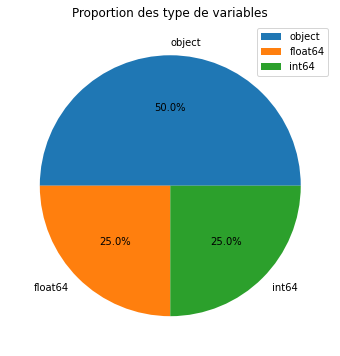

In [ ]:
# Afficher la proportion des types de variables
bank_marketing_data.dtypes.value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), label="", title="Proportion des type de variables")
plt.legend()
plt.show()

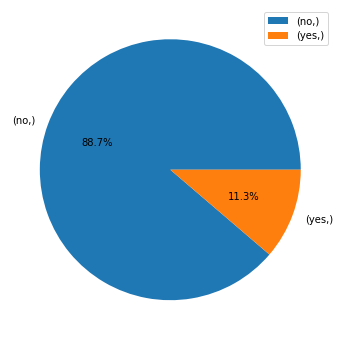

In [ ]:
# Visualisation de la variable target

# Afficher les proportion du nombre d'observation
pd.DataFrame(target).value_counts(normalize=True).plot.pie(autopct='%1.1f%%', figsize=(6, 6), label="")
plt.legend()
plt.show()

### 3.2. Analyse univariée

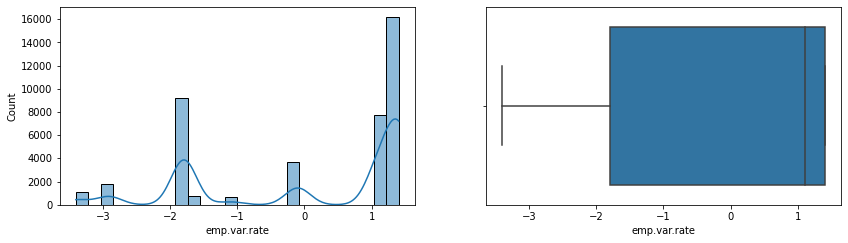

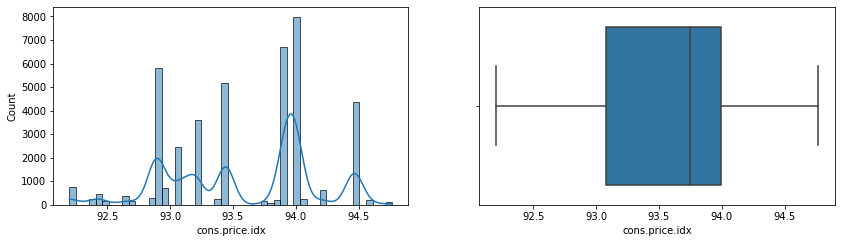

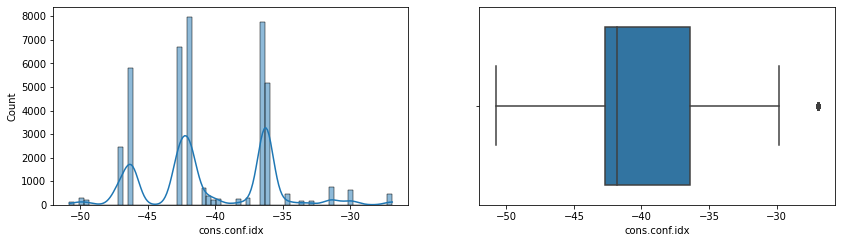

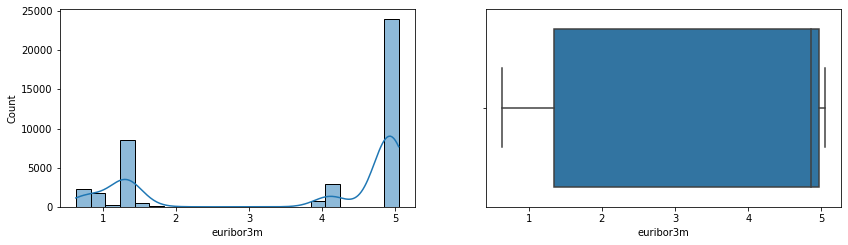

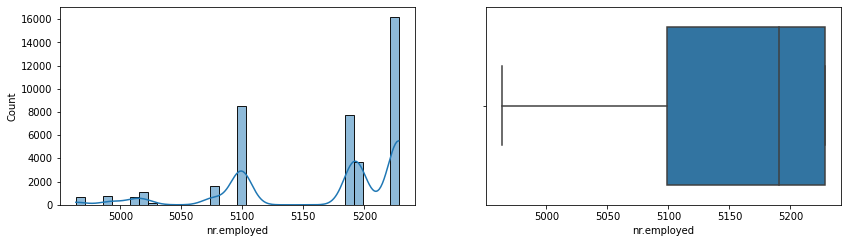

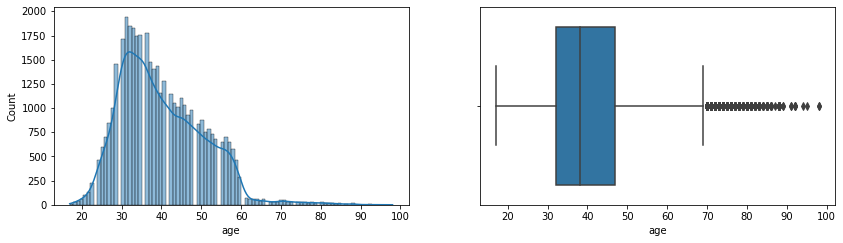

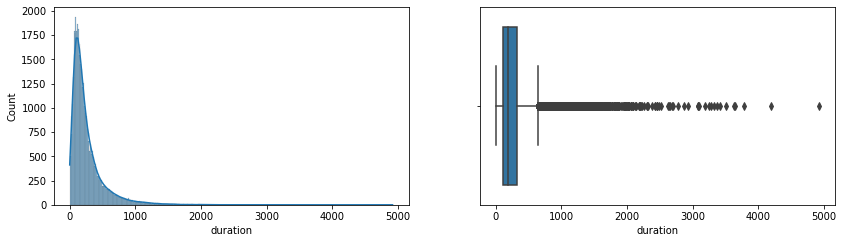

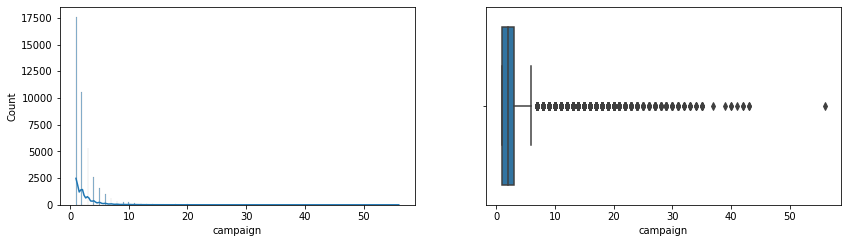

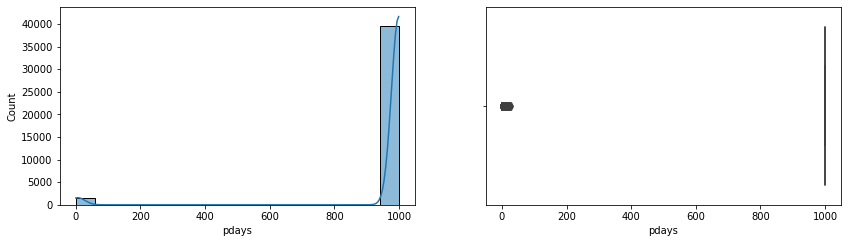

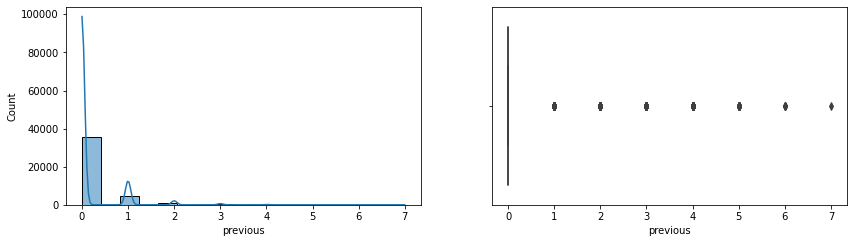

In [ ]:
# Variables Qauntitative
for col in  bank_marketing_data.select_dtypes('float').join( bank_marketing_data.select_dtypes('int64')):
    plt.figure(figsize=(14, 8))
    plt.subplot(2, 2, 1)
    sns.histplot(bank_marketing_data[col], kde=True)
    plt.subplot(2, 2, 2)
    sns.boxplot(data=bank_marketing_data, x=col)
plt.show()

job----------------------------------------------- ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital------------------------------------------- ['married' 'single' 'divorced' 'unknown']
education----------------------------------------- ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default------------------------------------------- ['no' 'unknown' 'yes']
housing------------------------------------------- ['no' 'yes' 'unknown']
loan---------------------------------------------- ['no' 'yes' 'unknown']
contact------------------------------------------- ['telephone' 'cellular']
month--------------------------------------------- ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week--------------------------------------- ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome--------------------------------------

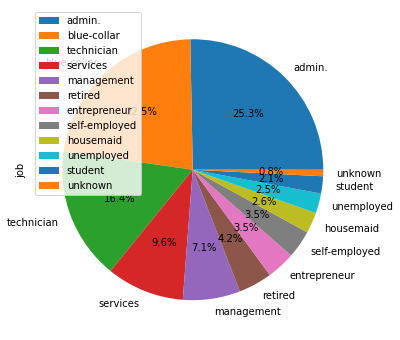

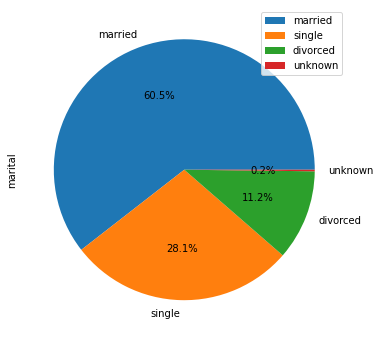

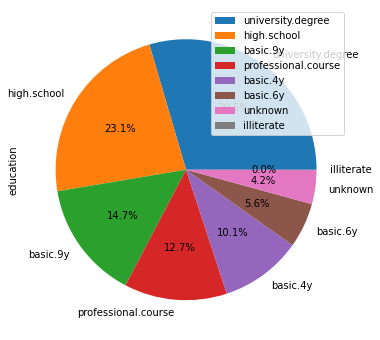

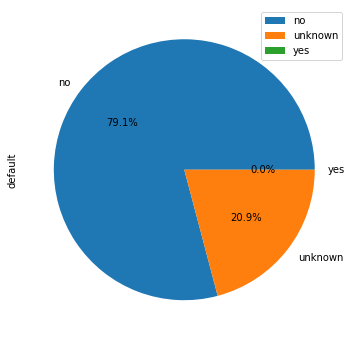

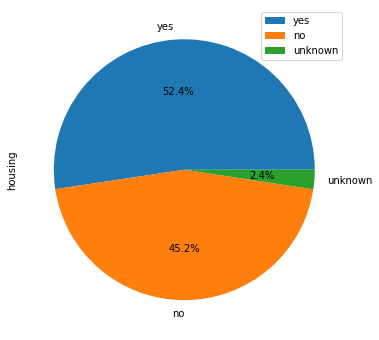

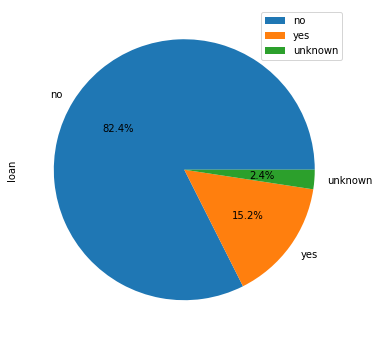

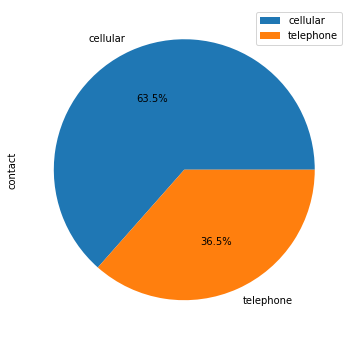

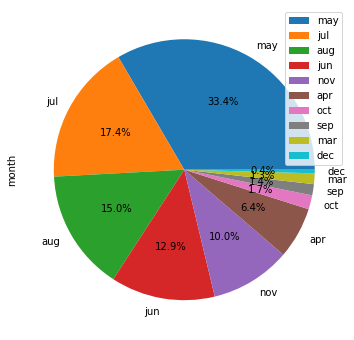

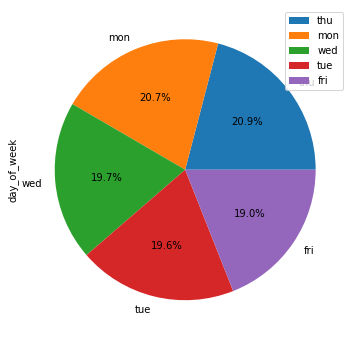

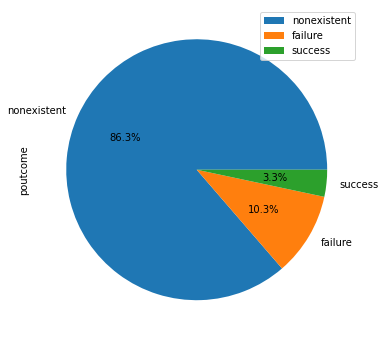

In [ ]:
# Variables Qualitatives
for col in bank_marketing_data.select_dtypes('object'):
    print(f'{col :-<50} {bank_marketing_data[col].unique()}')
    
    
for col in bank_marketing_data.select_dtypes('object'):
    plt.figure()
    bank_marketing_data[col].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), label=col)
    plt.legend()
    plt.show()

**Conclusion:**

- les classes sont déséquilibrées (11,3% contre 86,7%)
- L'ensemble de données contient des valeurs aberrantes dans les variables (âge, durée, campagne, jours, précédent)
- L'ensemble de données contient des valeurs manquantes dans des variables catégorielles et contient la valeur "inconnu"
- la variable "pdays" nous semble contenir des valeurs manquantes et celles-ci ont par défaut la valeur 999

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


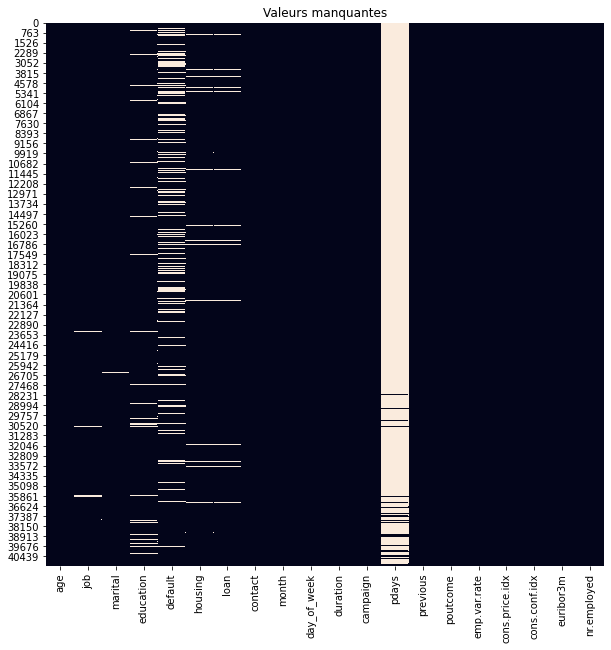

Valeurs manqunates:


age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             39673
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
dtype: int64

In [ ]:
# Visualisation des données manquantes

# Remplacer la valeur "unknown" par un np.NAN
for col in bank_marketing_data.select_dtypes('object'):
    bank_marketing_data[col][bank_marketing_data[col] == "unknown"] = np.NaN

# Remplacer la valeur 999 par np.NAN dans la variable "pdays"
bank_marketing_data.pdays[bank_marketing_data.pdays == 999] = np.NAN
    
plt.figure(figsize=(10, 10))
sns.heatmap(bank_marketing_data.isnull(), cbar=False)
plt.title("Valeurs manquantes")
plt.show()

print("Valeurs manqunates:")
bank_marketing_data.isnull().sum()

### 3.2. Analyse bivariée

In [ ]:
yes_bank_marketing_data = bank_marketing_data[target == "yes"]
no_bank_marketing_data = bank_marketing_data[target == "no"]

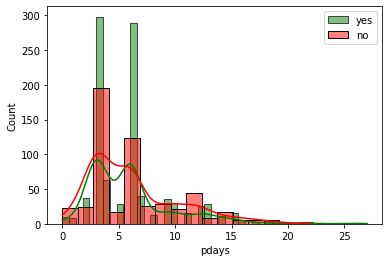

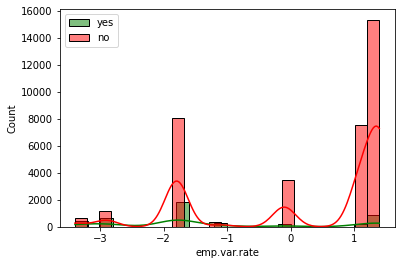

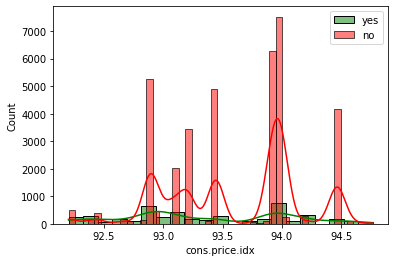

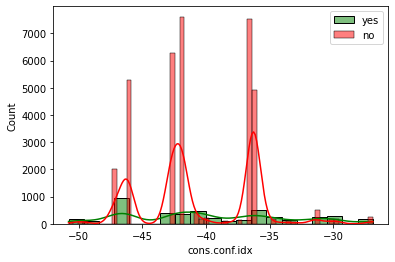

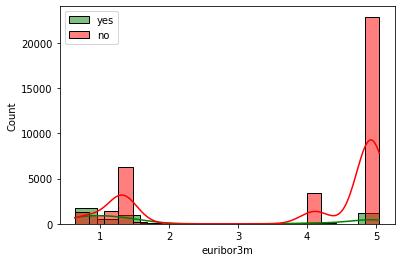

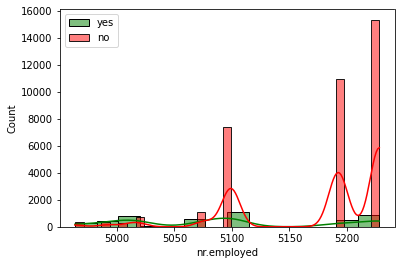

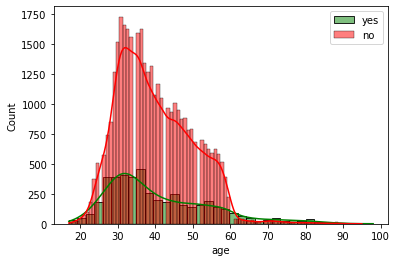

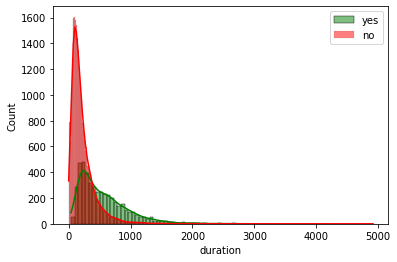

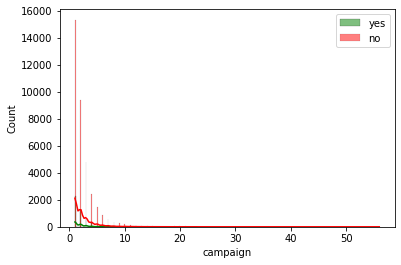

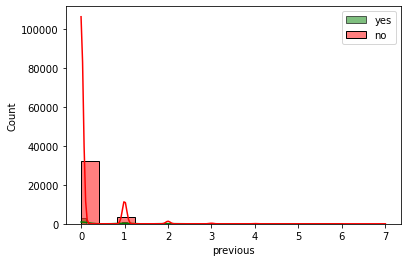

In [ ]:
for col in bank_marketing_data.select_dtypes('float').join( bank_marketing_data.select_dtypes('int64')):
    plt.figure()
    sns.histplot(yes_bank_marketing_data[col], kde=True, label="yes", color="green")
    sns.histplot(no_bank_marketing_data[col], kde=True, label="no", color="red")
    plt.legend()

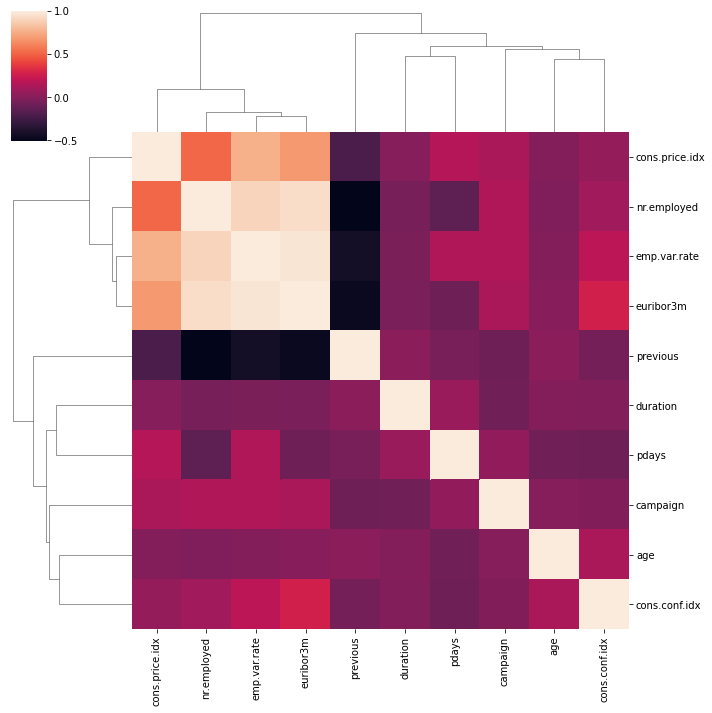

In [ ]:
# Matrice de correlation
sns.clustermap(bank_marketing_data.corr())

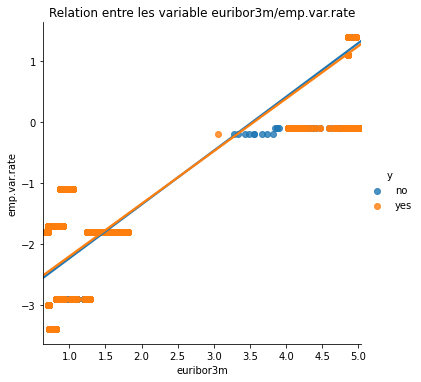

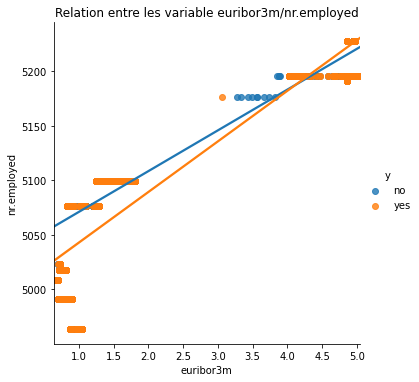

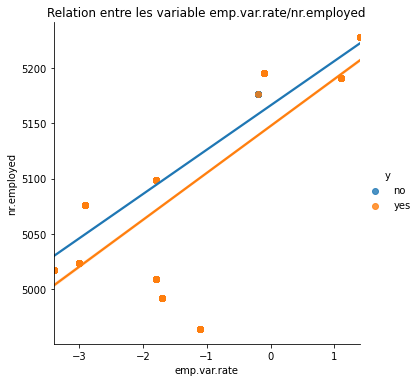

In [ ]:
# Relation entre les variable euribor3m/emp.var.rate
sns.lmplot(x='euribor3m', y="emp.var.rate", hue='y', data=pd.concat([bank_marketing_data, target], axis=1))
plt.title("Relation entre les variable euribor3m/emp.var.rate")
plt.show()

# Relation entre les variable euribor3m/'nr.employed'
sns.lmplot(x='euribor3m', y="nr.employed", hue='y', data=pd.concat([bank_marketing_data, target], axis=1))
plt.title("Relation entre les variable euribor3m/nr.employed")
plt.show()

# Relation entre les variable emp.var.rate/'nr.employed'
sns.lmplot(x='emp.var.rate', y="nr.employed", hue='y', data=pd.concat([bank_marketing_data, target], axis=1))
plt.title("Relation entre les variable emp.var.rate/nr.employed")
plt.show()

In [ ]:
bank_marketing_data.corr()['euribor3m'].sort_values()

previous         -0.454494
pdays            -0.081574
duration         -0.032897
age               0.010767
campaign          0.135133
cons.conf.idx     0.277686
cons.price.idx    0.688230
nr.employed       0.945154
emp.var.rate      0.972245
euribor3m         1.000000
Name: euribor3m, dtype: float64

**Conclusion**:

- pas de variables discriminantes
- la corrélation est très élevée entre les variables "euribor3m", "emp.var.rate", "nr.employed", "cons.price.idx", nous pouvons donc effectuer un test de student pour vérifier s'il existe un lien statistique et ne gardez qu'une seule variable pour la construction du modèle.
    

## 4. Prétraitement des données

In [ ]:
def preprocessing():
    
    # Créer un copie du dataframe
    df = bank_marketing_data.copy()
    
    # Supprimer la variable "pdays", car elle contiens beaucoup de valeurs manquantes
    df.drop(columns=["pdays"], inplace=True)
    
    # Suuprimer les deux variable "nr.employed", "emp.var.rate" qui sont correlées avec la variable "euribor3m"
    df.drop(columns=["nr.employed", "emp.var.rate"], inplace=True)
    
    return df

In [ ]:
# Appliquer la fonction de preprocessing sur les données de base
df = preprocessing()

# Afficher le dataframe
df.shape

(41188, 17)

## 5. Encodage des données

In [ ]:
## Encodage des données
class OrdinalEncoder:
    """
        Encode categorical features as a one-hot numeric dataframe.
    """
    def __init__(self,):
        self.new_columns = None
        
    def fit(self, X, y=None):
        self.columns = X.columns
        self.new_columns=pd.get_dummies(X, columns=self.columns).columns
        return self
    
    def transform(self, X, y=None):
        if self.new_columns is None :
            raise NotImplementedError()
        else :
            res = pd.get_dummies(X, columns=self.columns)
            for column in self.new_columns:
                if column not in res.columns:
                    res[column] = np.zeros(res.shape[0])
            return res[self.new_columns]
        
    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

## 6. Imputation des données manquantes

In [ ]:
# Encoder les données avant de faire l'imputation 

# Localiser les colonnes à imputer
columns_to_imput = df.columns[df.isnull().sum() > 0]
print(f"les colonnes à imputer : \n\t{columns_to_imput}\n")

# Localiser les autres colonnes 
other_columns = df.columns[df.isnull().sum() == 0]
print(f"les autres colonnes : \n\t{other_columns}\n")

for column in columns_to_imput:
    
    index_nan_values = df.index[df[column].isnull()]
    
    values = pd.concat([df[column]], axis=0)

    values = values.astype("category").cat.codes

    df[column] = values.loc[df.index]
    
    df[column].loc[index_nan_values] = np.NAN

les colonnes à imputer : 
	Index(['job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')

les autres colonnes : 
	Index(['age', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'],
      dtype='object')



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# Encoder les variable avant l'imputation
categorical_columns = ['contact', 'month', 'day_of_week', 'campaign', 'previous', 'poutcome']

numeric_columns = ['age', 'duration', 'campaign', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

encoder = OrdinalEncoder().fit(df[categorical_columns]) 

df_encoded = pd.concat([df[numeric_columns], encoder.transform(df[categorical_columns]), df[columns_to_imput]], axis=1)

df_encoded

,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,campaign_7,campaign_8,campaign_9,campaign_10,campaign_11,campaign_12,campaign_13,campaign_14,campaign_15,campaign_16,campaign_17,...,campaign_20,campaign_21,campaign_22,campaign_23,campaign_24,campaign_25,campaign_26,campaign_27,campaign_28,campaign_29,campaign_30,campaign_31,campaign_32,campaign_33,campaign_34,campaign_35,campaign_37,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_56,previous_0,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6,previous_7,poutcome_failure,poutcome_nonexistent,poutcome_success,job,marital,education,default,housing,loan
0,56,261,1,93.994,-36.4,4.857,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,3.0,1.0,0.0,0.0,0.0,0.0
1,57,149,1,93.994,-36.4,4.857,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,7.0,1.0,3.0,NaN,0.0,0.0
2,37,226,1,93.994,-36.4,4.857,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,7.0,1.0,3.0,0.0,1.0,0.0
3,40,151,1,93.994,-36.4,4.857,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0,1.0,1.0,0.0,0.0,0.0
4,56,307,1,93.994,-36.4,4.857,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,7.0,1.0,3.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,94.767,-50.8,1.028,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,5.0,1.0,5.0,0.0,1.0,0.0
41184,46,383,1,94.767,-50.8,1.028,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1.0,1.0,5.0,0.0,0.0,0.0
41185,56,189,2,94.767,-50.8,1.028,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,5.0,1.0,6.0,0.0,1.0,0.0
41186,44,442,1,94.767,-50.8,1.028,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,9.0,1.0,5.0,0.0,0.0,0.0


In [ ]:
# Define imputer
imputer = KNNImputer(n_neighbors=5)

# Fit on the dataset
imputer.fit(df_encoded)

# Estimer les valeurs manquantes
df_encoded_imputed = imputer.transform(df_encoded)

# Transformer le tableau en dataframe
df_encoded_imputed = pd.DataFrame(df_encoded_imputed, columns=df_encoded.columns, index=df_encoded.index)

# Encoder les valeurs catégorielles imputées
encoder_columns_imputed = OrdinalEncoder().fit(df_encoded_imputed[['marital', 'education', 'default', 'housing', 'loan']])

df_encoded_imputed = pd.concat(
    [
        df_encoded_imputed.drop(columns=['marital', 'education', 'default', 'housing', 'loan']),
        encoder_columns_imputed.transform(df_encoded_imputed[['marital', 'education', 'default', 'housing', 'loan']])
    ], axis=1)

# Afficher les nouvelles dimensions
print(f"Dimensions : \n\tlignes : {df_encoded_imputed.shape[0]}\n\tcolonnes : {df_encoded_imputed.shape[1]}")

# Afficher les premiers lignes du dataset
df_encoded_imputed

Dimensions : 
	lignes : 41188
	colonnes : 133


,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,campaign_7,campaign_8,campaign_9,campaign_10,campaign_11,campaign_12,campaign_13,campaign_14,campaign_15,campaign_16,campaign_17,...,education_1.2,education_1.4,education_1.6,education_1.8,education_2.0,education_2.2,education_2.4,education_2.6,education_2.8,education_3.0,education_3.2,education_3.4,education_3.6,education_3.8,education_4.0,education_4.2,education_4.4,education_4.6,education_4.8,education_5.0,education_5.2,education_5.4,education_5.6,education_5.8,education_6.0,default_0.0,default_0.2,default_1.0,housing_0.0,housing_0.2,housing_0.4,housing_0.6,housing_0.8,housing_1.0,loan_0.0,loan_0.2,loan_0.4,loan_0.6,loan_0.8,loan_1.0
0,56.0,261.0,1.0,93.994,-36.4,4.857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,57.0,149.0,1.0,93.994,-36.4,4.857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,37.0,226.0,1.0,93.994,-36.4,4.857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,40.0,151.0,1.0,93.994,-36.4,4.857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,56.0,307.0,1.0,93.994,-36.4,4.857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,334.0,1.0,94.767,-50.8,1.028,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
41184,46.0,383.0,1.0,94.767,-50.8,1.028,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
41185,56.0,189.0,2.0,94.767,-50.8,1.028,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
41186,44.0,442.0,1.0,94.767,-50.8,1.028,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Vérifier s'il ne reste pas de valeurs manquantes
df_encoded_imputed.isnull().sum().sum()

0

In [ ]:
# Normalisation des données
# Comme nous avons constatés qu'il y'a des variables contenant des valeurs abberantes
# Nous allons donc effectuer une normalisation basé sur la médian 
rebust_scaler = RobustScaler().fit(df_encoded_imputed)

df_encoded_imputed_normalised = pd.DataFrame(rebust_scaler.transform(df_encoded_imputed),
                                             columns=df_encoded_imputed.columns,
                                             index=df_encoded_imputed.index)

df_encoded_imputed_normalised

,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,campaign_7,campaign_8,campaign_9,campaign_10,campaign_11,campaign_12,campaign_13,campaign_14,campaign_15,campaign_16,campaign_17,...,education_1.2,education_1.4,education_1.6,education_1.8,education_2.0,education_2.2,education_2.4,education_2.6,education_2.8,education_3.0,education_3.2,education_3.4,education_3.6,education_3.8,education_4.0,education_4.2,education_4.4,education_4.6,education_4.8,education_5.0,education_5.2,education_5.4,education_5.6,education_5.8,education_6.0,default_0.0,default_0.2,default_1.0,housing_0.0,housing_0.2,housing_0.4,housing_0.6,housing_0.8,housing_1.0,loan_0.0,loan_0.2,loan_0.4,loan_0.6,loan_0.8,loan_1.0
0,1.200000,0.373272,-0.5,0.266594,0.857143,0.000000,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.266667,-0.142857,-0.5,0.266594,0.857143,0.000000,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.066667,0.211982,-0.5,0.266594,0.857143,0.000000,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.133333,-0.133641,-0.5,0.266594,0.857143,0.000000,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.200000,0.585253,-0.5,0.266594,0.857143,0.000000,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.333333,0.709677,-0.5,1.107726,-1.428571,-1.058612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41184,0.533333,0.935484,-0.5,1.107726,-1.428571,-1.058612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
41185,1.200000,0.041475,0.0,1.107726,-1.428571,-1.058612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,.

In [ ]:
# Encoder la variable "target"
y = LabelEncoder().fit_transform(target)

## 7. Train validation test split

In [ ]:
def train_validation_test_split(X, y, test_size=0.2, validation_size=0.2, random_state=1997):
    
    np.random.seed(random_state)
    index = np.arange(X.shape[0])
    np.random.shuffle(index)
    
    train_size = int((1 - test_size - validation_size) * X.shape[0]) 
    validation_size = int(validation_size * X.shape[0]) 
    test_size = int(test_size * X.shape[0])
    
    X_train = X.iloc[index[:train_size], :]
    y_train = y[index[:train_size]]
    
    X_validation = X.iloc[index[train_size : train_size + validation_size], :]
    y_validation = y[index[train_size : train_size + validation_size]]
        
    X_test = X.iloc[index[train_size + validation_size :], :]
    y_test = y[index[train_size + validation_size :] ]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

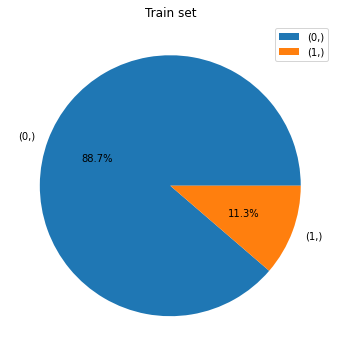

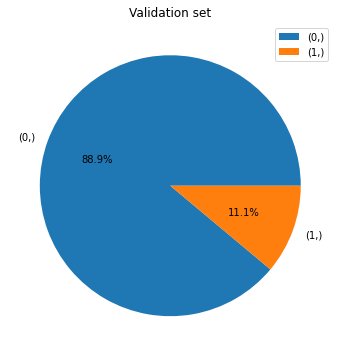

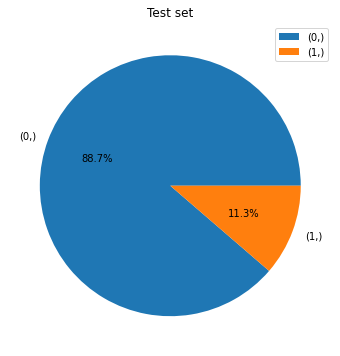

In [ ]:
 X_train, X_validation, X_test, y_train, y_validation, y_test = train_validation_test_split(df_encoded_imputed_normalised, y, test_size=0.2, validation_size=0.2)

# Afficher le nombre de donnnées dans chaque classe 
pd.DataFrame(y_train).value_counts(normalize=True).plot.pie(autopct='%1.1f%%', figsize=(6, 6), label="", title="Train set")
plt.legend()
plt.show()


# Afficher le nombre de donnnées dans chaque classe 
pd.DataFrame(y_validation).value_counts(normalize=True).plot.pie(autopct='%1.1f%%', figsize=(6, 6), label="", title="Validation set")
plt.legend()
plt.show()


# Afficher le nombre de donnnées dans chaque classe 
pd.DataFrame(y_test).value_counts(normalize=True).plot.pie(autopct='%1.1f%%', figsize=(6, 6), label="", title="Test set")
plt.legend()
plt.show()

# 8. Modelisation

## 8.1 Méthode d'évaludation

In [ ]:
# Definir la méthode d'evaluation du réseau de neuroune
auc_metrics = tf.keras.metrics.AUC(name="auc", curve="PR")


def auc_metric(estimator, X, y):
    
    y_pred = estimator.predict(X)
    
    # calculate sklearn AUC
    lr_precision, lr_recall, _ = precision_recall_curve(labels, pred_prob)
    pr_auc_score = auc(lr_recall, lr_precision)
    
    return pr_auc_score
    
# definir la fonction d'evaluatios robust et informative.
def evaluation(pred_prob, labels):
    
    # calculate sklearn AUC
    lr_precision, lr_recall, _ = precision_recall_curve(labels, pred_prob)
    pr_auc_score = auc(lr_recall, lr_precision)
    print(f"auc= { round(pr_auc_score, 2)}\n\n")
    
    # discretize the results
    pred = pred_prob.copy()
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0

    # Classification report
    print(classification_report(labels, pred))

    # Calculate the confusion matrix
    cm = confusion_matrix(labels, pred)
    sns.heatmap(cm,  annot=True, fmt='d')
    plt.title("Matrice de confusion")
    plt.show()

    
# Afficher le auc et l'erreur durant l'entrainement du model.
def plot_training_history(history):
    acc = history['auc']
    val_acc = history['val_auc']

    loss = history['loss']
    val_loss = history['val_loss']

    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Auc')
    plt.plot(val_acc, label='Validation Auc')
    plt.legend(loc='lower right')
    plt.ylabel('auc')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Auc')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

## 8.2 Estimation des hyperparamètres

Dans cette partie nous commencerons par estimer les hyperparamètres de notre réseau de neurones, avant d'appliquer les méthodes de "sous-échantillonnage" et de "suréchantillonnage" ect...

In [ ]:
# Nous allons échantillonner la dataframe pour en extraire un sous-ensemble, afin d'accélérer la phase d'estimation des hyperparamètres
# Ici, nous allons extraire le même numéro de classe, car nous utilisons simplement la précision comme métrique, mais uniquement dans cette partie d'estimation,
# des hyperparamètres, car nous avons des erreurs en utilisant la métrique "AUC" de keras.
index_subset = np.random.choice(np.arange(X_train.shape[0]), replace=False, p=np.ones(X_train.shape[0])/X_train.shape[0], size=200)

X_train_subset = X_train.iloc[index_subset, :]
y_train_subset = y_train[index_subset]

### 8.2.1. Estimation des hyperparametre "batch_size", "epochs" et "optimizer"

In [ ]:
# Definir la taille d'entrer de la couche cachée 
input_dim = X_train.shape[1]

In [ ]:
def create_model(optimizer='adam', learning_rate=0.001):

	# Creation du model
	model = tf.keras.Sequential()
	model.add(tf.keras.layers.Dense(12, input_dim=input_dim, activation='relu'))
	model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
 
	# Compiler le model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])

	return model

In [ ]:
# Fixer les nombre aléatoire
seed = 2021
np.random.seed(seed)
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model,  verbose=0)

In [ ]:
# definir la grid des parametres

param_grid = {
    "batch_size" : [1, 2, 5, 10, 20, 40, 60, 80, 100],
    "epochs" : [10, 50, 100],
    "optimizer" : ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'] 
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)

grid_result = grid.fit(X_train_subset, y_train_subset)

# evaluation
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 189 candidates, totalling 567 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 567 out of 567 | elapsed: 16.1min finished


Best: 0.925072 using {'batch_size': 10, 'epochs': 100, 'optimizer': 'SGD'}


### 8.2.2. Estimation de l'hyperparametre "learning_rate"

In [ ]:
# Definir les hyperparametres precedement estimés
epochs = 100
batch_size = 10

In [ ]:
def create_model(learning_rate=0.001):

  # Creation du model
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(12, input_dim=input_dim, activation='relu'))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  # definir l'optimizer
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, name="SGD")

  # Compiler le model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])

  return model

In [ ]:
# Fixer les nombre aléatoire
seed = 2021
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)

In [ ]:
# definir la grid des parametres

param_grid = {
    "learning_rate" : [0.01, 0.001, 0.0001, 0.00001]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)

grid_result = grid.fit(X_train_subset, y_train_subset)

# evaluation
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   18.8s finished


Best: 0.915121 using {'learning_rate': 0.01}


### 8.2.3. Estimation de la fonction d'activation des neurones

In [ ]:
# Definir les hyperparametres precedement estimés
epochs = 100
batch_size = 10

In [ ]:
def create_model(activation="relu"):

  # Creation du model
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(12, input_dim=input_dim, activation=activation))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  # definir l'optimizer
  optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, name="SGD")

  # Compiler le model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])

  return model

In [ ]:
# Fixer les nombre aléatoire
seed = 2021
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)

In [ ]:
# definir la grid des parametres

param_grid = {
    "activation" : ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)

grid_result = grid.fit(X_train_subset, y_train_subset)

# evaluation
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   42.0s finished


Best: 0.924996 using {'activation': 'linear'}


### 8.2.4. Estimation de la régularisation des abandons

In [ ]:
# Definir les hyperparametres precedement estimés
epochs = 100
batch_size = 10

In [ ]:
def create_model(dropout_rate=0.0):
  
  # Creation du model
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(12, input_dim=input_dim, activation="linear"))
  model.add(tf.keras.layers.Dropout(dropout_rate))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  # definir l'optimizer
  optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, name="SGD")

  # Compiler le model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])

  return model

In [ ]:
# Fixer les nombre aléatoire
seed = 2021
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)

In [ ]:
# definir la grid des parametres

param_grid = {
    "dropout_rate" : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)

grid_result = grid.fit(X_train_subset, y_train_subset)

# evaluation
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   51.8s finished


Best: 0.929971 using {'dropout_rate': 0.0}


### 8.2.5. Estimation du nombre de neuroune dans la couche cachée

In [ ]:
# Definir les hyperparametres precedement estimés
epochs = 100
batch_size = 10

In [ ]:
def create_model(neurons=1):
  
  # Creation du model
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(neurons, input_dim=input_dim, activation="linear"))
  model.add(tf.keras.layers.Dropout(0.0))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  # definir l'optimizer
  optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, name="SGD")

  # Compiler le model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])

  return model

In [ ]:
# Fixer les nombre aléatoire
seed = 2021
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)

In [ ]:
# definir la grid des parametres

param_grid = {
    "neurons" : [1, 5, 10, 15, 20, 25, 30]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)

grid_result = grid.fit(X_train_subset, y_train_subset)

# evaluation
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   33.7s finished


Best: 0.924996 using {'neurons': 20}


In [ ]:
# Définir la fonction, pour construire le modèle de base
def create_baseline_model():

	# Creation du model
	model = tf.keras.Sequential()
	model.add(tf.keras.layers.Dense(12, input_dim=input_dim, activation='relu'))
	model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
 
	# Compiler le model
	model.compile(loss='binary_crossentropy', optimizer="adam", metrics=[auc_metrics])

	return model

  
# Définir la fonction, pour construire le modèle adapté
def create_elaborate_model():

  # Creation du model
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(20, input_dim=input_dim, activation="linear"))
  model.add(tf.keras.layers.Dropout(0.0))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  # definir l'optimizer
  optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, name="SGD")

  # Compiler le model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[auc_metrics])

  return model

## 8.3. Entraînement simple

In [ ]:
# Construire le modèle de base et le modèle élaboré
#baseline_model = create_baseline_model()
elaborate_model = create_elaborate_model()

# Entrainer les deux modèles sur l'ensemble d'entraînement
print("baseline model fit")
#history_b= baseline_model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=100, batch_size=1, verbose=0)
print("\nelaborate model fit")
history_e= elaborate_model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=100, batch_size=1, verbose=0)

print("\n------------------------------EVALUATION DU MODEL DE BASE--------------------------------\n")
# Evaluer le model de base
_, auc_score = baseline_model.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

# Afficher la courbe d'apprentissage du model de base
plot_training_history(history_b.history)

# Evaluation avec la métrique "auc" de sklearn, et affichage de la matrice de confusion
pred_prob = baseline_model.predict(X_test)
evaluation(pred_prob, y_test)

print("\n------------------------------EVALUATION DU MODEL ELABORE--------------------------------\n")
# Evaluer le model élaboré
_, auc_score = elaborate_model.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

# Afficher la courbe d'apprentissage du model de élaboré
plot_training_history(history_e.history)

# Evaluation avec la métrique "auc" de sklearn, et affichage de la matrice de confusion
pred_prob = elaborate_model.predict(X_test)
evaluation(pred_prob, y_test)

baseline model fit

elaborate model fit


## 8.4. Entraînement avec pondération des classes


In [ ]:
# Définir la fonction pour calculer le poid de chaque classe 
def count_class_weight(data_labels):
    max_val = max((data_labels == 0).sum(), (data_labels == 1).sum())  
    class_weight = {
        0: round(max_val/(data_labels == 0).sum(), 2),
        1: round(max_val/(data_labels == 1).sum(), 2)
    }
    return class_weight

In [ ]:
# Calculer le de chaque classe 
class_weight = count_class_weight(y_train)
class_weight

In [ ]:
# Construire le modèle de base et le modèle élaboré
baseline_model = create_baseline_model()
elaborate_model = create_elaborate_model()

# Entrainer les deux modèles sur l'ensemble d'entraînement
print("baseline model fit")
history_1_b= baseline_model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=100, batch_size=1, class_weight=class_weight, verbose=0)
print("\nelaborate model fit")
history_1_e= elaborate_model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=100, batch_size=1, class_weight=class_weight, verbose=0)

print("\n------------------------------EVALUATION DU MODEL DE BASE--------------------------------\n")
# Evaluer le model de base
_, auc_score = baseline_model.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

# Afficher la courbe d'apprentissage du model de base
plot_training_history(history_1_b.history)

# Evaluation avec la métrique "auc" de sklearn, et affichage de la matrice de confusion
pred_prob = baseline_model.predict(X_test)
evaluation(pred_prob, y_test)

print("\n------------------------------EVALUATION DU MODEL ELABORE--------------------------------\n")
# Evaluer le model élaboré
_, auc_score = elaborate_model.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

# Afficher la courbe d'apprentissage du model de élaboré
plot_training_history(history_1_b.history)

# Evaluation avec la métrique "auc" de sklearn, et affichage de la matrice de confusion
pred_prob = elaborate_model.predict(X_test)
evaluation(pred_prob, y_test)

### 8.5.1. Random oversampling

le suréchantillonnage est une façon de résoudre ce problème est de suréchantillonner les exemples dans la classe minoritaire. Cela peut être réalisé en dupliquant simplement des exemples de la classe minoritaire dans l'ensemble de données d'apprentissage avant d'ajuster un modèle. Cela peut équilibrer la distribution des classes mais ne fournit aucune information supplémentaire au modèle.

In [ ]:
# Definir la fonction
def sampling(X, y, sampling_strategy=None, shuffle=True, random_state=1997):
    
    if random_state is not None:
        np.random.seed(random_state)
        
    index_classe_0 = np.arange(y.shape[0])[y == 0]
    index_classe_1 = np.arange(y.shape[0])[y == 1]
    
    if sampling_strategy is None:
        if index_classe_0.shape > index_classe_1.shape[0]:
            index_classe_1 = np.random.choice(index_classe_1, p=np.ones(index_classe_1.shape[0])/index_classe_1.shape[0], replace=True, size=index_classe_0.shape[0])
        else:
            index_classe_0 = np.random.choice(index_classe_0, p=np.ones(index_classe_0.shape[0])/index_classe_0.shape[0], replace=True, size=index_classe_1.shape[0])
    else:
        index_classe_1 = np.random.choice(index_classe_1, p=np.ones(index_classe_1.shape[0])/index_classe_1.shape[0], replace=True, size=sampling_strategy[1])
        index_classe_0 = np.random.choice(index_classe_0, p=np.ones(index_classe_0.shape[0])/index_classe_0.shape[0], replace=True, size=sampling_strategy[0])

    X, y = pd.concat([X.iloc[index_classe_0], X.iloc[index_classe_1]], axis=0), np.array([0]*sampling_strategy[0] + [1]*sampling_strategy[1])
    
    if shuffle:
        index = np.arange(X.shape[0])
        np.random.shuffle(index)
        return X.iloc[index], y[index]
    
    return X, y

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
over_strategy = {0:2224, 1:2224}
X_train_over, y_train_over =  sampling(X_train, y_train, sampling_strategy=over_strategy, random_state=1997)

# Afficher les nouvelles proportion des classe  
pd.DataFrame(y_train_over).value_counts(normalize=True).plot.pie(autopct='%1.1f%%', figsize=(6, 6), label="", title="Train set")
plt.legend()
plt.show()

# Afficher le nombre d'observations dans chaque classe
np.unique(y_train_over, return_counts=True)

In [ ]:
# Construire le modèle de base et le modèle élaboré
baseline_model = create_baseline_model()
elaborate_model = create_elaborate_model()

# Entrainer les deux modèles sur l'ensemble d'entraînement
print("baseline model fit")
history_b= baseline_model.fit(X_train_over, y_train_over, validation_data=(X_validation, y_validation), epochs=100, batch_size=1, verbose=0)
print("\nelaborate model fit")
history_e= elaborate_model.fit(X_train_over, y_train_over, validation_data=(X_validation, y_validation), epochs=100, batch_size=1, verbose=0)

print("\n------------------------------EVALUATION DU MODEL DE BASE--------------------------------\n")
# Evaluer le model de base
_, auc_score = baseline_model.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

# Afficher la courbe d'apprentissage du model de base
plot_training_history(history_b.history)

# Evaluation avec la métrique "auc" de sklearn, et affichage de la matrice de confusion
pred_prob = baseline_model.predict(X_test)
evaluation(pred_prob, y_test)

print("\n------------------------------EVALUATION DU MODEL ELABORE--------------------------------\n")
# Evaluer le model élaboré
_, auc_score = elaborate_model.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

# Afficher la courbe d'apprentissage du model de élaboré
plot_training_history(history_e.history)

# Evaluation avec la métrique "auc" de sklearn, et affichage de la matrice de confusion
pred_prob = elaborate_model.predict(X_test)
evaluation(pred_prob, y_test)

### 8.5.2. SMOTE

SMOTE fonctionne en sélectionnant des exemples qui sont proches dans l'espace des variables, en traçant une ligne entre les exemples dans l'espace des fonctionnalités et en dessinant un nouvel échantillon en un point le long de cette ligne.



In [ ]:
smote_strategy = {0:2224, 1:2224 }
X_train_smote, y_train_smote =  SMOTE(sampling_strategy=smote_strategy, random_state=1997).fit_resample(X_train, y_train)

# Afficher les nouvelles proportion des classe  
pd.DataFrame(y_train_smote).value_counts(normalize=True).plot.pie(autopct='%1.1f%%', figsize=(6, 6), label="", title="Train set")
plt.legend()
plt.show()

# Afficher le nombre d'observations dans chaque classe
np.unique(y_train_smote, return_counts=True)

In [ ]:
# Construire le modèle de base et le modèle élaboré
baseline_model = create_baseline_model()
elaborate_model = create_elaborate_model()

# Entrainer les deux modèles sur l'ensemble d'entraînement
print("baseline model fit")
history_b= baseline_model.fit(X_train_smote, y_train_smote , validation_data=(X_validation, y_validation), epochs=100, batch_size=1, verbose=0)
print("\nelaborate model fit")
history_e= elaborate_model.fit(X_train_smote, y_train_smote , validation_data=(X_validation, y_validation), epochs=100, batch_size=1, verbose=0)

print("\n------------------------------EVALUATION DU MODEL DE BASE--------------------------------\n")
# Evaluer le model de base
_, auc_score = baseline_model.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

# Afficher la courbe d'apprentissage du model de base
plot_training_history(history_b.history)

# Evaluation avec la métrique "auc" de sklearn, et affichage de la matrice de confusion
pred_prob = baseline_model.predict(X_test)
evaluation(pred_prob, y_test)

print("\n------------------------------EVALUATION DU MODEL ELABORE--------------------------------\n")
# Evaluer le model élaboré
_, auc_score = elaborate_model.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

# Afficher la courbe d'apprentissage du model de élaboré
plot_training_history(history_e.history)

# Evaluation avec la métrique "auc" de sklearn, et affichage de la matrice de confusion
pred_prob = elaborate_model.predict(X_test)
evaluation(pred_prob, y_test)

### 8.5.3. ADASYN

Une autre approche consiste à générer des échantillons synthétiques inversement proportionnels à la densité des exemples dans la classe minoritaire.

C'est-à-dire, générer des exemples plus synthétiques dans les régions de l'espace des caractéristiques où la densité des exemples minoritaires est faible, et moins ou aucun où la densité est élevée.

In [ ]:
adasyn_strategy = {0:2224, 1:2224 }
X_train_adasyn, y_train_adasyn =  ADASYN(sampling_strategy=adasyn_strategy, random_state=1997).fit_resample(X_train, y_train)

# Afficher les nouvelles proportion des classe  
pd.DataFrame(y_train_adasyn).value_counts(normalize=True).plot.pie(autopct='%1.1f%%', figsize=(6, 6), label="", title="Train set")
plt.legend()
plt.show()

# Afficher le nombre d'observations dans chaque classe
np.unique(y_train_adasyn, return_counts=True)

In [ ]:
# Construire le modèle de base et le modèle élaboré
baseline_model = create_baseline_model()
elaborate_model = create_elaborate_model()

# Entrainer les deux modèles sur l'ensemble d'entraînement
print("baseline model fit")
history_b= baseline_model.fit(X_train_adasyn, y_train_adasyn, validation_data=(X_validation, y_validation), epochs=100, batch_size=1, verbose=0)
print("\nelaborate model fit")
history_e= elaborate_model.fit(X_train_adasyn, y_train_adasyn, validation_data=(X_validation, y_validation), epochs=100, batch_size=1, verbose=0)

print("\n------------------------------EVALUATION DU MODEL DE BASE--------------------------------\n")
# Evaluer le model de base
_, auc_score = baseline_model.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

# Afficher la courbe d'apprentissage du model de base
plot_training_history(history_b.history)

# Evaluation avec la métrique "auc" de sklearn, et affichage de la matrice de confusion
pred_prob = baseline_model.predict(X_test)
evaluation(pred_prob, y_test)

print("\n------------------------------EVALUATION DU MODEL ELABORE--------------------------------\n")
# Evaluer le model élaboré
_, auc_score = elaborate_model.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

# Afficher la courbe d'apprentissage du model de élaboré
plot_training_history(history_e.history)

# Evaluation avec la métrique "auc" de sklearn, et affichage de la matrice de confusion
pred_prob = elaborate_model.predict(X_test)
evaluation(pred_prob, y_test)

## 8.6. Entraînement avec undersampling


### 8.6.1. Random undersampling

cette technique consiste à retirez au hasard les échantillons de la classe majoritaire, avec ou sans remplacement.

In [ ]:
under_strategy = {0:373, 1:373}
X_train_under, y_train_under =  sampling(X_train, y_train, sampling_strategy=under_strategy, random_state=1997)

# Afficher les nouvelles proportion des classe  
pd.DataFrame(y_train_under).value_counts(normalize=True).plot.pie(autopct='%1.1f%%', figsize=(6, 6), label="", title="Train set")
plt.legend()
plt.show()

# Afficher le nombre d'observations dans chaque classe
np.unique(y_train_under, return_counts=True)

In [ ]:
# Construire le modèle de base et le modèle élaboré
baseline_model = create_baseline_model()
elaborate_model = create_elaborate_model()

# Entrainer les deux modèles sur l'ensemble d'entraînement
print("baseline model fit")
history_b= baseline_model.fit(X_train_under, y_train_under, validation_data=(X_validation, y_validation), epochs=100, batch_size=1, verbose=0)
print("\nelaborate model fit")
history_e= elaborate_model.fit(X_train_under, y_train_under, validation_data=(X_validation, y_validation), epochs=100, batch_size=1, verbose=0)

print("\n------------------------------EVALUATION DU MODEL DE BASE--------------------------------\n")
# Evaluer le model de base
_, auc_score = baseline_model.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

# Afficher la courbe d'apprentissage du model de base
plot_training_history(history_b.history)

# Evaluation avec la métrique "auc" de sklearn, et affichage de la matrice de confusion
pred_prob = baseline_model.predict(X_test)
evaluation(pred_prob, y_test)

print("\n------------------------------EVALUATION DU MODEL ELABORE--------------------------------\n")
# Evaluer le model élaboré
_, auc_score = elaborate_model.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

# Afficher la courbe d'apprentissage du model de élaboré
plot_training_history(history_e.history)

# Evaluation avec la métrique "auc" de sklearn, et affichage de la matrice de confusion
pred_prob = elaborate_model.predict(X_test)
evaluation(pred_prob, y_test)

### 8.6.2. Tomek links

Cette technique onsiste à supprimer les observations de la classe majoritaire chevauchant celles de la classe minoritaire jusqu'à ce que toutes les paires de voisins les plus proches à une distance minimale soient de la même classe

In [ ]:
X_train_tomek, y_train_tomek = TomekLinks(n_jobs=-1).fit_resample(X_train, y_train)

# Afficher les nouvelles proportion des classe  
pd.DataFrame(y_train_under).value_counts(normalize=True).plot.pie(autopct='%1.1f%%', figsize=(6, 6), label="", title="Train set")
plt.legend()
plt.show()

# Afficher le nombre d'observations dans chaque classe
np.unique(y_train_under, return_counts=True)

In [ ]:
# Construire le model de base et le model élaboré
baseline_model = create_baseline_model()
elaborate_model = create_elaborate_model()

# Entrainer les deux models sur l'ensemble d'entrainement
history_1_b= baseline_model.fit(X_train_tomek, y_train_tomek, validation_data=(X_validation, y_validation), epochs=100, batch_size=1,  class_weight=class_weight)
history_1_e= elaborate_model.fit(X_train_tomek, y_train_tomek, validation_data=(X_validation, y_validation), epochs=100, batch_size=1,  class_weight=class_weight)

print("\n------------------------------EVALUATION--------------------------------\n")
# Evaluer les deux models
_, auc_score = history_1_b.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

_, auc_score = history_1_e.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

# Afficher la courbe d'apprentissage
plot_training_history(history_1_b.history)
plot_training_history(history_1_e.history)

# evaluation robuste
print("evaluation du model de base:")
pred_prob = baseline_model.predict(X_test)
evaluation(pred_prob, y_test)

print("evaluation du model élaboré")
pred_prob = elaborate_model.predict(X_test)
evaluation(pred_prob, y_test)

## 8.7. Entraînement avec une approche hybrid de resampling

### 8.7.1. Random oversampling + Tomek links

In [ ]:
over_strategy = {0:2224, 1:1000 }

X_train_over, y_train_over =  sampling(X_train, y_train, sampling_strategy=over_strategy, random_state=1997)

X_train_over_tomek, y_train_over_tomek = TomekLinks(n_jobs=-1).fit_resample(X_train_over, y_train_over)

# Afficher les nouvelles proportion des classe  
pd.DataFrame(y_train_over_tomek).value_counts(normalize=True).plot.pie(autopct='%1.1f%%', figsize=(6, 6), label="", title="Train set")
plt.legend()
plt.show()

# Afficher le nombre d'observations dans chaque classe
np.unique(y_train_over_tomek, return_counts=True)

In [ ]:
# Construire le modèle de base et le modèle élaboré
baseline_model = create_baseline_model()
elaborate_model = create_elaborate_model()

# Entrainer les deux modèles sur l'ensemble d'entraînement
print("baseline model fit")
history_b= baseline_model.fit(X_train_over_tomek, y_train_over_tomek , validation_data=(X_validation, y_validation), epochs=100, batch_size=1, verbose=0)
print("\nelaborate model fit")
history_e= elaborate_model.fit(X_train_over_tomek, y_train_over_tomek , validation_data=(X_validation, y_validation), epochs=100, batch_size=1, verbose=0)

print("\n------------------------------EVALUATION DU MODEL DE BASE--------------------------------\n")
# Evaluer le model de base
_, auc_score = baseline_model.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

# Afficher la courbe d'apprentissage du model de base
plot_training_history(history_b.history)

# Evaluation avec la métrique "auc" de sklearn, et affichage de la matrice de confusion
pred_prob = baseline_model.predict(X_test)
evaluation(pred_prob, y_test)

print("\n------------------------------EVALUATION DU MODEL ELABORE--------------------------------\n")
# Evaluer le model élaboré
_, auc_score = elaborate_model.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

# Afficher la courbe d'apprentissage du model de élaboré
plot_training_history(history_e.history)

# Evaluation avec la métrique "auc" de sklearn, et affichage de la matrice de confusion
pred_prob = elaborate_model.predict(X_test)
evaluation(pred_prob, y_test)

### 8.7.2. SMOTE + Tomek links

In [ ]:
smote_strategy = {0:2224, 1:1000 }
smote = SMOTE(sampling_strategy=smote_strategy, random_state=1997)

tomek = TomekLinks(n_jobs=-1)

steps = [('smote', smote), ("tomek", tomek)]
pipeline_over_tomek = Pipeline(steps=steps)


X_train_smote_tomek, y_train_smote_tomek = pipeline_over_tomek.fit_resample(X_train, y_train)

# Afficher les nouvelles proportion des classe  
pd.DataFrame(y_train_smote_tomek).value_counts(normalize=True).plot.pie(autopct='%1.1f%%', figsize=(6, 6), label="", title="Train set")
plt.legend()
plt.show()

# Afficher le nombre d'observations dans chaque classe
np.unique(y_train_smote_tomek, return_counts=True)

In [ ]:
# Construire le modèle de base et le modèle élaboré
baseline_model = create_baseline_model()
elaborate_model = create_elaborate_model()

# Entrainer les deux modèles sur l'ensemble d'entraînement
print("baseline model fit")
history_b= baseline_model.fit(X_train_smote_tomek, y_train_smote_tomek , validation_data=(X_validation, y_validation), epochs=100, batch_size=1, verbose=0)
print("\nelaborate model fit")
history_e= elaborate_model.fit(X_train_smote_tomek, y_train_smote_tomek , validation_data=(X_validation, y_validation), epochs=100, batch_size=1, verbose=0)

print("\n------------------------------EVALUATION DU MODEL DE BASE--------------------------------\n")
# Evaluer le model de base
_, auc_score = baseline_model.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

# Afficher la courbe d'apprentissage du model de base
plot_training_history(history_b.history)

# Evaluation avec la métrique "auc" de sklearn, et affichage de la matrice de confusion
pred_prob = baseline_model.predict(X_test)
evaluation(pred_prob, y_test)

print("\n------------------------------EVALUATION DU MODEL ELABORE--------------------------------\n")
# Evaluer le model élaboré
_, auc_score = elaborate_model.evaluate(X_test, y_test)
print('AUC: %.2f' % (auc_score*100))

# Afficher la courbe d'apprentissage du model de élaboré
plot_training_history(history_e.history)

# Evaluation avec la métrique "auc" de sklearn, et affichage de la matrice de confusion
pred_prob = elaborate_model.predict(X_test)
evaluation(pred_prob, y_test)